# Setup

In [61]:
import pandas as pd
import numpy as np
import os
import gzip
import glob
import json
from tqdm import tqdm

In [62]:
config = json.load(open("config.json"))

# Load images

In [63]:
with gzip.open(os.path.join(config["data"]["path"],'images/metadata/images.csv.gz')) as f:
    images_meta = pd.read_csv(f)
images_meta.head()

,image_id,height,width,path
0,010-mllS7JL,106,106,14/14fe8812.jpg
1,01dkn0Gyx0L,122,122,da/daab0cad.jpg
2,01sUPg0387L,111,111,d2/d2daaae9.jpg
3,1168jc-5r1L,186,186,3a/3a4e88e6.jpg
4,11RUV5Fs65L,30,500,d9/d91ab9cf.jpg


In [64]:
images_meta.shape

(398212, 4)

In [65]:
images_meta.isna().sum()

image_id    0
height      0
width       0
path        0
dtype: int64

# Load texts

Skip to [this part](#import-listings-csv) if you already have the *concatenated listings* exported as CSV, otherwise continue.

The following code may take some time (20-30mins)

In [5]:
json_pattern = os.path.join(config["data"]["path"],'listings/metadata/listings_*.json.gz')
print(json_pattern)
file_list = glob.glob(json_pattern)
dfs = []

for f in file_list:
    with gzip.open(f) as f2:
        data = pd.read_json(f2, lines=True)
        print(f, len(data))
        for i, row in tqdm(data.iterrows(), total=data.shape[0]):
            dfs2 = []
            for k in row.keys():
                if (type(row[k]) is list):
                    if (type(row[k][0]) is dict):
                        dfs2.append(pd.json_normalize(row[k][0]).add_prefix(k + "."))
                    else:
                        dfs2.append(pd.DataFrame({k: [row[k]]}))
                else:
                    dfs2.append(pd.DataFrame({k: [row[k]]}))
            dfs.append(dfs2)

./datasets/abo/listings/metadata/listings_*.json
./datasets/abo/listings/metadata/listings_a.json 9232


100%|██████████| 9232/9232 [01:21<00:00, 113.35it/s]


./datasets/abo/listings/metadata/listings_6.json 9232


100%|██████████| 9232/9232 [01:18<00:00, 117.30it/s]


./datasets/abo/listings/metadata/listings_c.json 9232


100%|██████████| 9232/9232 [01:17<00:00, 118.98it/s]


./datasets/abo/listings/metadata/listings_7.json 9232


100%|██████████| 9232/9232 [01:16<00:00, 120.60it/s]


./datasets/abo/listings/metadata/listings_3.json 9232


100%|██████████| 9232/9232 [01:18<00:00, 117.65it/s]


./datasets/abo/listings/metadata/listings_d.json 9232


100%|██████████| 9232/9232 [01:20<00:00, 114.65it/s]


./datasets/abo/listings/metadata/listings_4.json 9232


100%|██████████| 9232/9232 [01:20<00:00, 114.08it/s]


./datasets/abo/listings/metadata/listings_0.json 9232


100%|██████████| 9232/9232 [01:13<00:00, 125.10it/s]


./datasets/abo/listings/metadata/listings_2.json 9232


100%|██████████| 9232/9232 [01:24<00:00, 109.47it/s]


./datasets/abo/listings/metadata/listings_e.json 9232


100%|██████████| 9232/9232 [01:14<00:00, 124.70it/s]


./datasets/abo/listings/metadata/listings_b.json 9232


100%|██████████| 9232/9232 [01:26<00:00, 106.67it/s]


./datasets/abo/listings/metadata/listings_f.json 9222


100%|██████████| 9222/9222 [01:13<00:00, 126.11it/s]


./datasets/abo/listings/metadata/listings_5.json 9232


100%|██████████| 9232/9232 [01:14<00:00, 124.48it/s]


./datasets/abo/listings/metadata/listings_9.json 9232


100%|██████████| 9232/9232 [01:29<00:00, 103.48it/s]


./datasets/abo/listings/metadata/listings_8.json 9232


100%|██████████| 9232/9232 [01:13<00:00, 125.15it/s]


./datasets/abo/listings/metadata/listings_1.json 9232


100%|██████████| 9232/9232 [01:14<00:00, 124.19it/s]


Serializing as pickle may take too long. Recommend exporting to CSV instead, it is much faster.

In [ ]:
# import pickle
# with open("dfs", "wb") as fp:
#     pickle.dump(dfs, fp)

In [ ]:
# dfs = []

# with open("dfs", "rb") as fp:
#     dfs = pickle.load(fp)

The following two cells may take 5-10mins.

In [6]:
dfs_1 = []

for df in tqdm(dfs):
    dfs_1.append(pd.concat(df, axis=1))

100%|██████████| 147702/147702 [02:51<00:00, 861.85it/s] 


In [7]:
dfs_2 = pd.concat(dfs_1)
dfs_2

,item_dimensions,brand.language_tag,brand.value,bullet_point.language_tag,bullet_point.value,color.language_tag,color.value,item_id,item_name.language_tag,item_name.value,...,fabric_type.value,node,item_shape.language_tag,item_shape.value,product_description.language_tag,product_description.value,finish_type.language_tag,finish_type.value,brand,item_name.alternate_representations
0,{'height': {'normalized_value': {'unit': 'inch...,es_ES,Pinzon by Amazon,es_ES,Sábana bajera ajustable - Dimensiones: 90 x 20...,es_ES,Azul,B00MGSFTLE,es_ES,"Pinzon by Amazon 'Everyday' Spannbetttuch, Bau...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,en_IN,Klepe,hi_IN,आउटर मटीरियल: PU,hi_IN,गहरा ग्रे(स्लेटी),B07WRK7NGQ,en_IN,Klepe Men's Dark Grey Running Shoes-11 UK (45 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,en_IN,Amazon Brand - Solimo,en_IN,"Snug fit for Samsung Galaxy M21, with perfect ...",en_IN,Multicolor,B08511RJ3W,en_IN,Amazon Brand - Solimo Designer Two Different P...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,en_IN,Amazon Brand - Solimo,en_IN,"Snug fit for Samsung Galaxy M21, with perfect ...",en_IN,Multicolor,B08511NVLY,en_IN,Amazon Brand - Solimo Designer Wooden Blocks T...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,{'height': {'normalized_value': {'unit': 'inch...,en_US,Allegro Coffee,en_US,Kosher,NaN,NaN,B078ZMFWC3,en_US,"Allegro Tea, Tea Spice Puer Yunnan Organic, 0....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,en_IN,Flavia,ml_IN,പുറമെയുള്ള മെറ്റീരിയൽ: PU,ml_IN,ഇളം ചാരനിറം,B07ZFRKDSD,ml_IN,Flavia സ്ത്രീകളുടെ Ballet ഫ്ലാറ്റ്സ് - ചാരനിറം...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,{'height': {'normalized_value': {'unit': 'inch...,de_DE,Tovess,de_DE,"Ein Premium Dry Gin, der im „Single Batch“-Des...",NaN,NaN,B07WQJ3DZ8,de_DE,"Tovess- Single Batch Crafted Gin (0,04 l)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,{'height': {'normalized_value': {'unit': 'inch...,en_US,365 Everyday Value,en_US,Produced without added hormones.,NaN,NaN,B074H65ZYT,en_US,"365 Everyday Value, Havarti Cheese, Slices, 12 oz",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,en_US,Red Wagon,en_US,Suede-effect upper,en_US,Grey,B072KWH977,en_US,"Red Wagon Girls' Muck Desert Boots, Grey, 8 us",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dfs_2["other_image_id"].notna()

0    True
0    True
0    True
0    True
0    True
     ... 
0    True
0    True
0    True
0    True
0    True
Name: other_image_id, Length: 147702, dtype: bool

In [9]:
dfs_2.reset_index(drop=True, inplace=True)
dfs_2.to_csv(os.path.join(config["data"]["path"], "listings/listings.csv"))

## Import listings CSV

In [68]:
from ast import literal_eval
dfs = pd.read_csv(os.path.join(config["data"]["path"], "listings/listings.csv"))

/tmp/ipykernel_30868/1491763312.py:2: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = pd.read_csv(os.path.join(config["data"]["path"], "listings/listings.csv"))


In [69]:
dfs = dfs.drop(['Unnamed: 0'], axis=1)
#dfs = dfs.drop(['Unnamed: 0.1'], axis=1)
dfs

,item_dimensions,brand.language_tag,brand.value,bullet_point.language_tag,bullet_point.value,color.language_tag,color.value,item_id,item_name.language_tag,item_name.value,...,fabric_type.value,node,item_shape.language_tag,item_shape.value,product_description.language_tag,product_description.value,finish_type.language_tag,finish_type.value,brand,item_name.alternate_representations
0,{'height': {'normalized_value': {'unit': 'inch...,es_ES,Pinzon by Amazon,es_ES,Sábana bajera ajustable - Dimensiones: 90 x 20...,es_ES,Azul,B00MGSFTLE,es_ES,"Pinzon by Amazon 'Everyday' Spannbetttuch, Bau...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,en_IN,Klepe,hi_IN,आउटर मटीरियल: PU,hi_IN,गहरा ग्रे(स्लेटी),B07WRK7NGQ,en_IN,Klepe Men's Dark Grey Running Shoes-11 UK (45 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,en_IN,Amazon Brand - Solimo,en_IN,"Snug fit for Samsung Galaxy M21, with perfect ...",en_IN,Multicolor,B08511RJ3W,en_IN,Amazon Brand - Solimo Designer Two Different P...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,en_IN,Amazon Brand - Solimo,en_IN,"Snug fit for Samsung Galaxy M21, with perfect ...",en_IN,Multicolor,B08511NVLY,en_IN,Amazon Brand - Solimo Designer Wooden Blocks T...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,{'height': {'normalized_value': {'unit': 'inch...,en_US,Allegro Coffee,en_US,Kosher,NaN,NaN,B078ZMFWC3,en_US,"Allegro Tea, Tea Spice Puer Yunnan Organic, 0....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147697,NaN,en_IN,Flavia,ml_IN,പുറമെയുള്ള മെറ്റീരിയൽ: PU,ml_IN,ഇളം ചാരനിറം,B07ZFRKDSD,ml_IN,Flavia സ്ത്രീകളുടെ Ballet ഫ്ലാറ്റ്സ് - ചാരനിറം...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147698,{'height': {'normalized_value': {'unit': 'inch...,de_DE,Tovess,de_DE,"Ein Premium Dry Gin, der im „Single Batch“-Des...",NaN,NaN,B07WQJ3DZ8,de_DE,"Tovess- Single Batch Crafted Gin (0,04 l)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147699,{'height': {'normalized_value': {'unit': 'inch...,en_US,365 Everyday Value,en_US,Produced without added hormones.,NaN,NaN,B074H65ZYT,en_US,"365 Everyday Value, Havarti Cheese, Slices, 12 oz",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147700,NaN,en_US,Red Wagon,en_US,Suede-effect upper,en_US,Grey,B072KWH977,en_US,"Red Wagon Girls' Muck Desert Boots, Grey, 8 us",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Augmentation with alternative product images

You may skip this section if this augmentation is not needed.

In [70]:
dfs["other_image_id"] = dfs["other_image_id"].fillna("[]")

In [71]:
dfs["other_image_id"] = dfs["other_image_id"].apply(literal_eval)

In [72]:
dfs_3 = dfs.explode(["other_image_id"])

In [73]:
dfs_3["main_image_id"] = dfs_3["other_image_id"]

In [74]:
dfs = pd.concat([dfs, dfs_3])
dfs

,item_dimensions,brand.language_tag,brand.value,bullet_point.language_tag,bullet_point.value,color.language_tag,color.value,item_id,item_name.language_tag,item_name.value,...,fabric_type.value,node,item_shape.language_tag,item_shape.value,product_description.language_tag,product_description.value,finish_type.language_tag,finish_type.value,brand,item_name.alternate_representations
0,{'height': {'normalized_value': {'unit': 'inch...,es_ES,Pinzon by Amazon,es_ES,Sábana bajera ajustable - Dimensiones: 90 x 20...,es_ES,Azul,B00MGSFTLE,es_ES,"Pinzon by Amazon 'Everyday' Spannbetttuch, Bau...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,en_IN,Klepe,hi_IN,आउटर मटीरियल: PU,hi_IN,गहरा ग्रे(स्लेटी),B07WRK7NGQ,en_IN,Klepe Men's Dark Grey Running Shoes-11 UK (45 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,en_IN,Amazon Brand - Solimo,en_IN,"Snug fit for Samsung Galaxy M21, with perfect ...",en_IN,Multicolor,B08511RJ3W,en_IN,Amazon Brand - Solimo Designer Two Different P...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,en_IN,Amazon Brand - Solimo,en_IN,"Snug fit for Samsung Galaxy M21, with perfect ...",en_IN,Multicolor,B08511NVLY,en_IN,Amazon Brand - Solimo Designer Wooden Blocks T...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,{'height': {'normalized_value': {'unit': 'inch...,en_US,Allegro Coffee,en_US,Kosher,NaN,NaN,B078ZMFWC3,en_US,"Allegro Tea, Tea Spice Puer Yunnan Organic, 0....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147701,NaN,en_IN,Amazon Brand - Symactive,ml_IN,ഔട്ടർ മെറ്റീരിയൽ: മെഷ്,ml_IN,ചാരനിറം,B07VCK2GF4,ml_IN,Amazon Brand - Symactive പുരുഷന്മാരുടെ റണ്ണിംഗ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147701,NaN,en_IN,Amazon Brand - Symactive,ml_IN,ഔട്ടർ മെറ്റീരിയൽ: മെഷ്,ml_IN,ചാരനിറം,B07VCK2GF4,ml_IN,Amazon Brand - Symactive പുരുഷന്മാരുടെ റണ്ണിംഗ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147701,NaN,en_IN,Amazon Brand - Symactive,ml_IN,ഔട്ടർ മെറ്റീരിയൽ: മെഷ്,ml_IN,ചാരനിറം,B07VCK2GF4,ml_IN,Amazon Brand - Symactive പുരുഷന്മാരുടെ റണ്ണിംഗ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147701,NaN,en_IN,Amazon Brand - Symactive,ml_IN,ഔട്ടർ മെറ്റീരിയൽ: മെഷ്,ml_IN,ചാരനിറം,B07VCK2GF4,ml_IN,Amazon Brand - Symactive പുരുഷന്മാരുടെ റണ്ണിംഗ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
dfs.reset_index(drop=True, inplace=True)
dfs

,item_dimensions,brand.language_tag,brand.value,bullet_point.language_tag,bullet_point.value,color.language_tag,color.value,item_id,item_name.language_tag,item_name.value,...,fabric_type.value,node,item_shape.language_tag,item_shape.value,product_description.language_tag,product_description.value,finish_type.language_tag,finish_type.value,brand,item_name.alternate_representations
0,{'height': {'normalized_value': {'unit': 'inch...,es_ES,Pinzon by Amazon,es_ES,Sábana bajera ajustable - Dimensiones: 90 x 20...,es_ES,Azul,B00MGSFTLE,es_ES,"Pinzon by Amazon 'Everyday' Spannbetttuch, Bau...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,en_IN,Klepe,hi_IN,आउटर मटीरियल: PU,hi_IN,गहरा ग्रे(स्लेटी),B07WRK7NGQ,en_IN,Klepe Men's Dark Grey Running Shoes-11 UK (45 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,en_IN,Amazon Brand - Solimo,en_IN,"Snug fit for Samsung Galaxy M21, with perfect ...",en_IN,Multicolor,B08511RJ3W,en_IN,Amazon Brand - Solimo Designer Two Different P...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,en_IN,Amazon Brand - Solimo,en_IN,"Snug fit for Samsung Galaxy M21, with perfect ...",en_IN,Multicolor,B08511NVLY,en_IN,Amazon Brand - Solimo Designer Wooden Blocks T...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,{'height': {'normalized_value': {'unit': 'inch...,en_US,Allegro Coffee,en_US,Kosher,NaN,NaN,B078ZMFWC3,en_US,"Allegro Tea, Tea Spice Puer Yunnan Organic, 0....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720949,NaN,en_IN,Amazon Brand - Symactive,ml_IN,ഔട്ടർ മെറ്റീരിയൽ: മെഷ്,ml_IN,ചാരനിറം,B07VCK2GF4,ml_IN,Amazon Brand - Symactive പുരുഷന്മാരുടെ റണ്ണിംഗ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720950,NaN,en_IN,Amazon Brand - Symactive,ml_IN,ഔട്ടർ മെറ്റീരിയൽ: മെഷ്,ml_IN,ചാരനിറം,B07VCK2GF4,ml_IN,Amazon Brand - Symactive പുരുഷന്മാരുടെ റണ്ണിംഗ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720951,NaN,en_IN,Amazon Brand - Symactive,ml_IN,ഔട്ടർ മെറ്റീരിയൽ: മെഷ്,ml_IN,ചാരനിറം,B07VCK2GF4,ml_IN,Amazon Brand - Symactive പുരുഷന്മാരുടെ റണ്ണിംഗ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720952,NaN,en_IN,Amazon Brand - Symactive,ml_IN,ഔട്ടർ മെറ്റീരിയൽ: മെഷ്,ml_IN,ചാരനിറം,B07VCK2GF4,ml_IN,Amazon Brand - Symactive പുരുഷന്മാരുടെ റണ്ണിംഗ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploration

## Columns, size...

In [76]:
dfs.columns

Index(['item_dimensions', 'brand.language_tag', 'brand.value',
       'bullet_point.language_tag', 'bullet_point.value', 'color.language_tag',
       'color.value', 'item_id', 'item_name.language_tag', 'item_name.value',
       'item_weight.unit', 'item_weight.value',
       'item_weight.normalized_value.unit',
       'item_weight.normalized_value.value', 'material.language_tag',
       'material.value', 'model_number.value', 'pattern.language_tag',
       'pattern.value', 'product_type.value', 'style.language_tag',
       'style.value', 'main_image_id', 'other_image_id',
       'item_keywords.language_tag', 'item_keywords.value', 'country',
       'marketplace', 'domain_name', 'node.node_id', 'node.node_name',
       'color_code', 'model_name', 'spin_id', '3dmodel_id', 'model_year',
       'fabric_type', 'item_shape', 'product_description', 'finish_type',
       'color.standardized_values', 'item_weight', 'pattern', 'style',
       'model_name.language_tag', 'model_name.value', 'color

In [77]:
dfs.shape

(720954, 63)

## Class distribution

[Text(0, 0, 'CELLULAR_PHONE_CASE'),
 Text(1, 0, 'SHOES'),
 Text(2, 0, 'GROCERY'),
 Text(3, 0, 'HOME'),
 Text(4, 0, 'HOME_BED_AND_BATH'),
 Text(5, 0, 'HOME_FURNITURE_AND_DECOR'),
 Text(6, 0, 'CHAIR'),
 Text(7, 0, 'SANDAL'),
 Text(8, 0, 'BOOT'),
 Text(9, 0, 'HEALTH_PERSONAL_CARE'),
 Text(10, 0, 'SOFA'),
 Text(11, 0, 'PET_SUPPLIES'),
 Text(12, 0, 'TABLE'),
 Text(13, 0, 'OFFICE_PRODUCTS'),
 Text(14, 0, 'HARDWARE_HANDLE'),
 Text(15, 0, 'HANDBAG'),
 Text(16, 0, 'FINERING'),
 Text(17, 0, 'SPORTING_GOODS'),
 Text(18, 0, 'RUG'),
 Text(19, 0, 'LIGHT_BULB')]

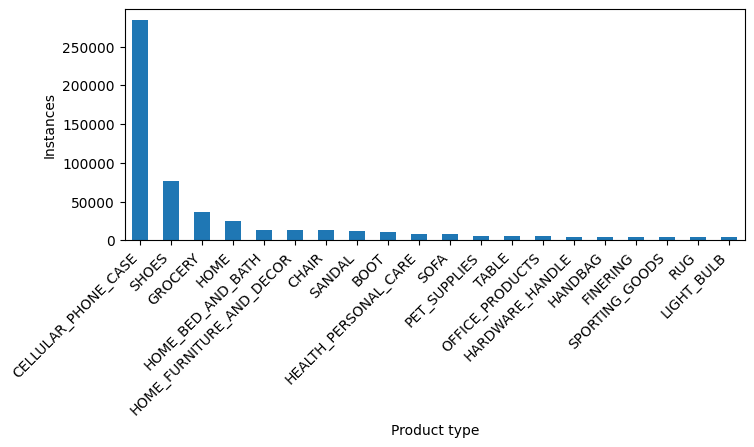

In [78]:
top_n = 20

ax = dfs.groupby(['product_type.value']).size().sort_values(ascending=False).head(top_n).plot.bar(rot=45, figsize=(8,3), xlabel="Product type", ylabel="Instances")
ax.set_xticklabels(ax.get_xticklabels(), ha="right")

In [79]:
dfs.groupby(['product_type.value']).size().sort_values()

product_type.value
SKIN_FOUNDATION_CONCEALER         2
TIMER                             2
SLEEP_MASK                        2
STROLLER                          2
TERMINAL_BLOCK                    2
                              ...  
HOME_BED_AND_BATH             13536
HOME                          25573
GROCERY                       36380
SHOES                         76887
CELLULAR_PHONE_CASE          283549
Length: 576, dtype: int64

# Ground truth

In [80]:
listings_new = dfs[["item_keywords.value", "brand.value", "item_id", "item_name.language_tag", "item_name.value", "product_type.value", "product_description.value", "main_image_id"]]

## Merge images and texts

In [81]:
ground_truth = listings_new.merge(images_meta, left_on='main_image_id', right_on='image_id')

## Copy columns for experiments on extended MNN-EM

In [82]:
ground_truth["item_keywords.value2"] = ground_truth["item_keywords.value"]
ground_truth["item_id2"] = ground_truth["item_id"]
ground_truth["item_name.value2"] = ground_truth["item_name.value"]

## Target labels for MNN-EM

In [83]:
ground_truth["label"] = 1

In [84]:
ground_truth.head(10)

,item_keywords.value,brand.value,item_id,item_name.language_tag,item_name.value,product_type.value,product_description.value,main_image_id,image_id,height,width,path,item_keywords.value2,item_id2,item_name.value2,label
0,sabana bajera 90 135x190 ofertas flash del dia...,Pinzon by Amazon,B00MGSFTLE,es_ES,"Pinzon by Amazon 'Everyday' Spannbetttuch, Bau...",HOME_BED_AND_BATH,NaN,81duX-6eMDL,81duX-6eMDL,2142,2560,cd/cdefa595.jpg,sabana bajera 90 135x190 ofertas flash del dia...,B00MGSFTLE,"Pinzon by Amazon 'Everyday' Spannbetttuch, Bau...",1
1,fitted sheets double sheet super king size bed...,Pinzon by Amazon,B00MGSF860,en_GB,"Pinzon by Amazon Everyday Cotton Fitted Sheet,...",HOME_BED_AND_BATH,NaN,81duX-6eMDL,81duX-6eMDL,2142,2560,cd/cdefa595.jpg,fitted sheets double sheet super king size bed...,B00MGSF860,"Pinzon by Amazon Everyday Cotton Fitted Sheet,...",1
2,Sheets,Pinzon by Amazon,B00MGSFYJ6,nl_NL,"Pinzon by Amazon Everyday Hoeslaken, katoen, 1...",HOME_BED_AND_BATH,NaN,81duX-6eMDL,81duX-6eMDL,2142,2560,cd/cdefa595.jpg,Sheets,B00MGSFYJ6,"Pinzon by Amazon Everyday Hoeslaken, katoen, 1...",1
3,NaN,Pinzon by Amazon,B00MGSFJO6,nl_NL,"Pinzon by Amazon Fitted Sheets, 100% katoen, b...",HOME_BED_AND_BATH,NaN,81duX-6eMDL,81duX-6eMDL,2142,2560,cd/cdefa595.jpg,NaN,B00MGSFJO6,"Pinzon by Amazon Fitted Sheets, 100% katoen, b...",1
4,Sheets,Pinzon by Amazon,B00MGSFPBS,en_GB,"Pinzon Ultrasoft 180TC Fitted Sheets, Blue 135...",HOME_BED_AND_BATH,NaN,81duX-6eMDL,81duX-6eMDL,2142,2560,cd/cdefa595.jpg,Sheets,B00MGSFPBS,"Pinzon Ultrasoft 180TC Fitted Sheets, Blue 135...",1
5,Sheets,Pinzon by Amazon,B00MGSF496,nl_NL,"Pinzon by Amazon Everyday Hoeslaken, katoen, 1...",HOME_BED_AND_BATH,NaN,81duX-6eMDL,81duX-6eMDL,2142,2560,cd/cdefa595.jpg,Sheets,B00MGSF496,"Pinzon by Amazon Everyday Hoeslaken, katoen, 1...",1
6,100% bed bedding bedroom colours cover duvet d...,Pinzon by Amazon,B00MGSF9ZK,nl_NL,Pinzon Ultrasoft 180TC Hoeslaken (meerdere mat...,HOME_BED_AND_BATH,NaN,81duX-6eMDL,81duX-6eMDL,2142,2560,cd/cdefa595.jpg,100% bed bedding bedroom colours cover duvet d...,B00MGSF9ZK,Pinzon Ultrasoft 180TC Hoeslaken (meerdere mat...,1
7,spännlakan 90 x 200 140 x lakan 180 x 200 180 ...,Pinzon by Amazon,B00MGSFRS4,sv_SE,"Pinzon från Amazon dra-på-lakan, 100% bomull, blå",HOME_BED_AND_BATH,NaN,81duX-6eMDL,81duX-6eMDL,2142,2560,cd/cdefa595.jpg,spännlakan 90 x 200 140 x lakan 180 x 200 180 ...,B00MGSFRS4,"Pinzon från Amazon dra-på-lakan, 100% bomull, blå",1
8,lenzuolo con angoli matrimoniale 160x190 vesti...,Pinzon by Amazon,B00MGSF2DE,it_IT,"Pinzon by Amazon 'Everyday' Spannbetttuch, Bau...",HOME_BED_AND_BATH,NaN,81duX-6eMDL,81duX-6eMDL,2142,2560,cd/cdefa595.jpg,lenzuolo con angoli matrimoniale 160x190 vesti...,B00MGSF2DE,"Pinzon by Amazon 'Everyday' Spannbetttuch, Bau...",1
9,spännlakan 140 x 200 160 x lakan 180 x 200 180...,Pinzon by Amazon,B00MGSFGC6,sv_SE,"Pinzon från Amazon dra-på-lakan, 100% bomull, blå",HOME_BED_AND_BATH,NaN,81duX-6eMDL,81duX-6eMDL,2142,2560,cd/cdefa595.jpg,spännlakan 140 x 200 160 x lakan 180 x 200 180...,B00MGSFGC6,"Pinzon från Amazon dra-på-lakan, 100% bomull, blå",1


In [85]:
ground_truth[ground_truth["item_id"] == "B07TBV5BY9"]

,item_keywords.value,brand.value,item_id,item_name.language_tag,item_name.value,product_type.value,product_description.value,main_image_id,image_id,height,width,path,item_keywords.value2,item_id2,item_name.value2,label
120957,mobile cover,Amazon Brand - Solimo,B07TBV5BY9,en_IN,Amazon Brand - Solimo Designer No 3D Printed H...,CELLULAR_PHONE_CASE,NaN,71hKkUIj9dL,71hKkUIj9dL,2200,1879,b0/b01a3299.jpg,mobile cover,B07TBV5BY9,Amazon Brand - Solimo Designer No 3D Printed H...,1
189772,mobile cover,Amazon Brand - Solimo,B07TBV5BY9,en_IN,Amazon Brand - Solimo Designer No 3D Printed H...,CELLULAR_PHONE_CASE,NaN,61oI69Yt4GL,61oI69Yt4GL,1107,1280,ee/ee8ee952.jpg,mobile cover,B07TBV5BY9,Amazon Brand - Solimo Designer No 3D Printed H...,1
223087,mobile cover,Amazon Brand - Solimo,B07TBV5BY9,en_IN,Amazon Brand - Solimo Designer No 3D Printed H...,CELLULAR_PHONE_CASE,NaN,61Xce1Hq7DL,61Xce1Hq7DL,1059,1500,49/49b1b22b.jpg,mobile cover,B07TBV5BY9,Amazon Brand - Solimo Designer No 3D Printed H...,1
256405,mobile cover,Amazon Brand - Solimo,B07TBV5BY9,en_IN,Amazon Brand - Solimo Designer No 3D Printed H...,CELLULAR_PHONE_CASE,NaN,61ATVyzpLKL,61ATVyzpLKL,1500,1500,66/66f3a68c.jpg,mobile cover,B07TBV5BY9,Amazon Brand - Solimo Designer No 3D Printed H...,1
650517,mobile cover,Amazon Brand - Solimo,B07TBV5BY9,en_IN,Amazon Brand - Solimo Designer No 3D Printed H...,CELLULAR_PHONE_CASE,NaN,811HRaF0oOL,811HRaF0oOL,2200,1879,b9/b92cff25.jpg,mobile cover,B07TBV5BY9,Amazon Brand - Solimo Designer No 3D Printed H...,1


# False samples/Complement

In [86]:
false_samples = ground_truth.apply(np.random.permutation, axis=0)

## Target labels for MNN-EM

In [87]:
false_samples["label"] = 0

In [88]:
false_samples.head(10)

,item_keywords.value,brand.value,item_id,item_name.language_tag,item_name.value,product_type.value,product_description.value,main_image_id,image_id,height,width,path,item_keywords.value2,item_id2,item_name.value2,label
0,NaN,Amazon Brand - Solimo,B082PN1DYF,zh_CN,"365 Everyday Value, Corn & Rice Gluten Free Sp...",CELLULAR_PHONE_CASE,NaN,91Atf2mXd3L,81p6dll0FvL,2560,500,f3/f31ed86d.jpg,planters,B079G3398H,Marchio Amazon - Belei - Maschera illuminante ...,0
1,mobile cover,Ravenna Home,B07514F84F,en_US,Amazon Brand – Rivet Contemporary Striated Jut...,CELLULAR_PHONE_CASE,NaN,61oI69Yt4GL,41Pp7+MHXZL,2200,2560,56/5678ad83.jpg,poco x2 360 cover,B07T2K5NVF,Amazon Brand – Stone & Beam Javier Burnished B...,0
2,mobile cover,find.,B0857LT2DY,en_IN,Amazon Brand - Solimo Designer Multi Shape Tex...,SOFA,NaN,91mbAzMZGCL,A1+ZoC2HeWL,1284,1000,b0/b058684f.jpg,mobile cover,B00BJ1200M,Amazon Brand - Solimo Designer Texture Design ...,0
3,area-rugs,Rivet,B01JG8EDNQ,it_IT,Amazon Brand - Solimo Designer Toy Car 3D Prin...,GROCERY,NaN,71gfxA5U-VL,717BiEZiSVL,2200,1879,4a/4a6b5e50.jpg,mobile cover,B074H7KLKB,"365 by Whole Foods Market, Organic Pure 100% G...",0
4,"amazon brand, amazon vitamins, vitamins by ama...",AmazonBasics,B07MBFCR9L,ml_IN,Amazon Brand - Movian Rotsee - Sofá de 2 plaza...,TOWEL_HOLDER,NaN,615AgoNYlwL,61oI69Yt4GL,2267,1500,75/753ab218.jpg,NaN,B07V2456KB,"365 Everyday Value, Cheese Curls, 7 oz",0
5,NaN,Solimo,B0854CTNYJ,en_IN,AmazonBasics RM-AZ-6191-00 - Cartucho de tinta...,CELLULAR_PHONE_CASE,NaN,71qpTeFyPiL,31zz1oUYe+L,1100,1306,59/5943bbd7.jpg,mobile cover,B0757NMPKL,"Ravenna Home 磨砂玻璃客厅立式落地灯带 LED 灯泡 - 69.75 英寸高, ...",0
6,whimsical,Amazon Brand - Solimo,B071WK8QFY,en_IN,Amazon Brand - Solimo Designer Boy Shoes Patte...,WALL_ART,NaN,61oDyLNbwpL,61oI69Yt4GL,2200,1879,eb/eb717e50.jpg,mobile cover,B07913D6Q2,Amazon Brand - Solimo Designer Small Squre Pat...,0
7,Back Cover,Amazon Brand - Solimo,B07VSFHPCL,en_IN,Amazon Brand - Solimo Designer Tree Painting 3...,GROCERY,NaN,51JkbvhChXL,81-TY-nyLyL,2200,1500,66/66f3a68c.jpg,friandise pour chien,B07RHTYWQN,Amazon Brand - Solimo Designer Don't Kill My V...,0
8,mobile cover,Centrino,B07TQH9G9P,en_GB,Amazon Brand - Solimo Designer Paintings 3D Pr...,SANDAL,NaN,71s7NrE2FaL,71ncfz+HrAL,1500,1500,0b/0be7a54b.jpg,Hard Case,B07B4M6CFN,Amazon Brand - Solimo Designer S Shape Pattern...,0
9,Elise printed thong flip flops upper cushioned...,Amazon Brand - Solimo,B0788D3ZD3,en_AU,Stone & ♛ Marbury 84 Poutre de Traitement pour...,CELLULAR_PHONE_CASE,NaN,51AbYbblgmL,71jCvT8RpTL,2200,1412,3d/3da74631.jpg,basics,B0857KSTGG,Centrino Men's S5535 Navy Loafers-6 UK (40 EU)...,0


# Combine ground truth and complement

In [89]:
dataset = pd.concat([ground_truth, false_samples])

In [90]:
# random shuffle
dataset_final = dataset.sample(frac=1, axis=0).reset_index(drop=True)

## Drop unneeded columns

In [91]:
dataset_final = dataset_final.drop(["main_image_id", "image_id", "height", "width", "product_description.value"], axis=1)

In [92]:
dataset_final

,item_keywords.value,brand.value,item_id,item_name.language_tag,item_name.value,product_type.value,path,item_keywords.value2,item_id2,item_name.value2,label
0,NaN,AmazonBasics,B07ZW5QLT9,en_US,Whole Foods Market Body Scrub & Body Butter Du...,CELLULAR_PHONE_CASE,66/66f3a68c.jpg,cellphonecover,B019OL9E02,Amazon Brand - Solimo Printed Fabric Storage B...,0
1,mobile cover,Amazon Brand - Solimo,B07TBV4DC8,en_IN,Amazon Brand - Solimo Designer Blue Pattern Al...,CELLULAR_PHONE_CASE,5d/5d4519b7.jpg,NaN,B07PQBDBC4,STARTER Performance Slide Sandalia para Hombre...,0
2,NaN,AmazonBasics,B08569L71K,en_IN,Amazon Brand - Solimo Designer Wooden Texture ...,GROCERY,fa/fabf5deb.jpg,sandal for women stylish,B07HS8L5QL,Amazon Brand - Solimo Designer Zik Zak Color M...,0
3,mobile cover,AmazonBasics,B07VXVZWS3,en_IN,"365 Everyday Value, Two-bite Cinnamon Rolls, 1...",PLANTER,d9/d9f55153.jpg,mascherine bambini chirurgiche porta mascherin...,B07RGQGYVZ,Amazon Brand – Stone & Beam Modern Red and Gol...,0
4,NaN,365 by Whole Foods Market,B084T9V3PP,en_CA,Amazon Brand - Solimo Designer Heart Texture 3...,CELLULAR_PHONE_CASE,ea/eaa03873.jpg,tray,B07NQMHG6S,Amazon Brand - House & Shields Men's Black/Whi...,0
...,...,...,...,...,...,...,...,...,...,...,...
1421301,scopa parquet per esterni spazzola rotante pul...,AmazonBasics,B072KLF8HP,it_IT,"AmazonBasics Counter Brush, 6-pack",CLEANING_BRUSH,ec/ec263d6c.jpg,scopa parquet per esterni spazzola rotante pul...,B072KLF8HP,"AmazonBasics Counter Brush, 6-pack",1
1421302,ratching,AmazonBasics,B088W5DHSQ,en_US,AmazonBasics 45-Degree Offset Double Ring Wren...,TOOLS,b2/b2bbf71b.jpg,ratching,B088W5DHSQ,AmazonBasics 45-Degree Offset Double Ring Wren...,1
1421303,Zapatos Zapato para de mujer Mujer Mujer Botas,206 Collective,B01N5XR84J,es_MX,206 Collective Mujer Whidbey Botas de equitación,SHOES,71/71844ce3.jpg,Zapatos Zapato para de mujer Mujer Mujer Botas,B01N5XR84J,206 Collective Mujer Whidbey Botas de equitación,1
1421304,mobile cover,Amazon Brand - Solimo,B07TG4VRGD,en_IN,Amazon Brand - Solimo Designer Oil Color 3D Pr...,CELLULAR_PHONE_CASE,66/66f3a68c.jpg,mobile cover,B07TG4VRGD,Amazon Brand - Solimo Designer Oil Color 3D Pr...,1


## Select only english articles

In [93]:
dataset_final = dataset_final.loc[(dataset_final['item_name.language_tag'] == "en_US") | (dataset_final['item_name.language_tag'] == "en_GB") | (dataset_final['item_name.language_tag'] == "en_IN")]

In [94]:
dataset_final = dataset_final.drop(["brand.value", "item_name.language_tag"], axis=1)

In [95]:
dataset_final = dataset_final.reset_index(drop=True)

In [96]:
dataset_final

,item_keywords.value,item_id,item_name.value,product_type.value,path,item_keywords.value2,item_id2,item_name.value2,label
0,NaN,B07ZW5QLT9,Whole Foods Market Body Scrub & Body Butter Du...,CELLULAR_PHONE_CASE,66/66f3a68c.jpg,cellphonecover,B019OL9E02,Amazon Brand - Solimo Printed Fabric Storage B...,0
1,mobile cover,B07TBV4DC8,Amazon Brand - Solimo Designer Blue Pattern Al...,CELLULAR_PHONE_CASE,5d/5d4519b7.jpg,NaN,B07PQBDBC4,STARTER Performance Slide Sandalia para Hombre...,0
2,NaN,B08569L71K,Amazon Brand - Solimo Designer Wooden Texture ...,GROCERY,fa/fabf5deb.jpg,sandal for women stylish,B07HS8L5QL,Amazon Brand - Solimo Designer Zik Zak Color M...,0
3,mobile cover,B07VXVZWS3,"365 Everyday Value, Two-bite Cinnamon Rolls, 1...",PLANTER,d9/d9f55153.jpg,mascherine bambini chirurgiche porta mascherin...,B07RGQGYVZ,Amazon Brand – Stone & Beam Modern Red and Gol...,0
4,formal shoes for mens leather,B082DFT9HP,Nubeno Men's Brown Formal Shoes-9 UK (43 EU) (...,SHOES,cc/cc2759da.jpg,formal shoes for mens leather,B082DFT9HP,Nubeno Men's Brown Formal Shoes-9 UK (43 EU) (...,1
...,...,...,...,...,...,...,...,...,...
879059,mobile cover,B077GTLHTP,"Amazon Brand - find. Bootie, Women’s Heels San...",CELLULAR_PHONE_CASE,b3/b36856cb.jpg,resistance bands Fitnessbänder Gymnastikband N...,B08544GDNM,AmazonBasics Door Levers - Curve AB-DH507-SN 1,0
879060,Back Cover,B0854L5NDJ,Amazon Brand - Solimo Designer Sparkle Girl Bo...,CELLULAR_PHONE_CASE,36/368ecbc0.jpg,Back Cover,B0854L5NDJ,Amazon Brand - Solimo Designer Sparkle Girl Bo...,1
879061,ratching,B088W5DHSQ,AmazonBasics 45-Degree Offset Double Ring Wren...,TOOLS,b2/b2bbf71b.jpg,ratching,B088W5DHSQ,AmazonBasics 45-Degree Offset Double Ring Wren...,1
879062,mobile cover,B07TG4VRGD,Amazon Brand - Solimo Designer Oil Color 3D Pr...,CELLULAR_PHONE_CASE,66/66f3a68c.jpg,mobile cover,B07TG4VRGD,Amazon Brand - Solimo Designer Oil Color 3D Pr...,1


## Random deletion of attributes

In [97]:
dataset_final.isnull().sum()

item_keywords.value     96368
item_id                     0
item_name.value             0
product_type.value          0
path                        0
item_keywords.value2    96068
item_id2                    0
item_name.value2            0
label                       0
dtype: int64

In [98]:
dataset_final.loc[dataset_final["item_keywords.value"].sample(frac=.5).index]

,item_keywords.value,item_id,item_name.value,product_type.value,path,item_keywords.value2,item_id2,item_name.value2,label
48988,parking,B07TGZMHPH,Concept 3 by Skechers Sheen & Luster Lace-up S...,CELLULAR_PHONE_CASE,ee/ee8ee952.jpg,funda celular case fundas accesorios con phone...,B07K67RRXF,[Amazon Collection] Amazon Collection(Amazon C...,0
626548,wrestling knee pads,B07QW1JYKM,Amazon Brand - Solimo Designer Water Drop 3D P...,HOME,a7/a7658290.jpg,NaN,B07SYLRMFY,"365 Everyday Value, Paper Towels, 1 ct",0
165430,NaN,B07FP1NZZJ,Eono Essentials Compact Pocket Blanket,SPORTING_GOODS,23/23029482.jpg,NaN,B07FP1NZZJ,Eono Essentials Compact Pocket Blanket,1
779504,meal kits,B07QFSNHCV,"Amazon Meal Kits, Caribbean-Spiced Steak and J...",GROCERY,07/0748d071.jpg,meal kits,B07QFSNHCV,"Amazon Meal Kits, Caribbean-Spiced Steak and J...",1
198624,mobile cover,B081HN737K,Amazon Brand - Solimo Designer Eiffel Tower 3D...,CELLULAR_PHONE_CASE,d8/d89025e7.jpg,mobile cover,B081HN737K,Amazon Brand - Solimo Designer Eiffel Tower 3D...,1
...,...,...,...,...,...,...,...,...,...
98903,NaN,B086WQFQN6,AmazonCommercial Mini Brush and Dustpan Set - ...,JANITORIAL_SUPPLY,09/091308a7.jpg,NaN,B086WQFQN6,AmazonCommercial Mini Brush and Dustpan Set - ...,1
571937,Classics With A Twist,B0156G2UQ4,14k White Gold Round-Cut Diamond Solitaire Pen...,FINENECKLACEBRACELETANKLET,9e/9eb555dd.jpg,Classics With A Twist,B0156G2UQ4,14k White Gold Round-Cut Diamond Solitaire Pen...,1
448077,Back Cover,B081Z9L8KW,Amazon Brand - Solimo Andy మైక్రోఫైబర్ ప్రింటె...,BOOT,5a/5a31f61a.jpg,pelican case hard camera peli foam for hrdcase...,B07TH2YQJ1,Amazon Brand - Solimo Designer Peacock Pattern...,0
859046,cellphonecover,B0856964QD,Amazon Brand - Solimo Designer Multicolor Lady...,CELLULAR_PHONE_CASE,ac/ac1a2f39.jpg,cellphonecover,B0856964QD,Amazon Brand - Solimo Designer Multicolor Lady...,1


In [99]:
dataset_final["item_keywords.value"] = dataset_final["item_keywords.value"].sample(frac=.5)
dataset_final["item_id"] = dataset_final["item_id"].sample(frac=.5)
dataset_final["item_name.value"] = dataset_final["item_name.value"].sample(frac=.5)

In [100]:
dataset_final["item_keywords.value2"] = dataset_final["item_keywords.value2"].sample(frac=.5)
dataset_final["item_id2"] = dataset_final["item_id2"].sample(frac=.5)
dataset_final["item_name.value2"] = dataset_final["item_name.value2"].sample(frac=.5)

In [101]:
dataset_final.isnull().sum()

item_keywords.value     487697
item_id                 439532
item_name.value         439532
product_type.value           0
path                         0
item_keywords.value2    487507
item_id2                439532
item_name.value2        439532
label                        0
dtype: int64

In [102]:
# dataset_final = dataset_final.dropna()     # if random deletion isn't used, execute this line instead
dataset_final = dataset_final.fillna("")

## Concatenate attributes into description columns

`description` is used for MNN-EM and MNN-BTL, while `description2` is used for Extended MNN-EM

In [103]:
dataset_final["description"] = dataset_final["item_keywords.value"] + dataset_final["item_id"] + dataset_final["item_name.value"]# + dataset_final["product_type.value"]

In [104]:
dataset_final["description2"] = dataset_final["item_keywords.value2"] + dataset_final["item_id2"] + dataset_final["item_name.value2"]# + dataset_final["product_type.value"]

In [105]:
dataset_final = dataset_final[["description", "description2", "path", "label", "product_type.value"]]

In [106]:
dataset_final

,description,description2,path,label,product_type.value
0,Whole Foods Market Body Scrub & Body Butter Du...,cellphonecoverB019OL9E02Amazon Brand - Solimo ...,66/66f3a68c.jpg,0,CELLULAR_PHONE_CASE
1,mobile cover,B07PQBDBC4STARTER Performance Slide Sandalia p...,5d/5d4519b7.jpg,0,CELLULAR_PHONE_CASE
2,,B07HS8L5QLAmazon Brand - Solimo Designer Zik Z...,fa/fabf5deb.jpg,0,GROCERY
3,mobile cover,B07RGQGYVZAmazon Brand – Stone & Beam Modern R...,d9/d9f55153.jpg,0,PLANTER
4,B082DFT9HPNubeno Men's Brown Formal Shoes-9 UK...,formal shoes for mens leather,cc/cc2759da.jpg,1,SHOES
...,...,...,...,...,...
879059,B077GTLHTP,,b3/b36856cb.jpg,0,CELLULAR_PHONE_CASE
879060,Amazon Brand - Solimo Designer Sparkle Girl Bo...,Back CoverB0854L5NDJAmazon Brand - Solimo Desi...,36/368ecbc0.jpg,1,CELLULAR_PHONE_CASE
879061,ratchingB088W5DHSQAmazonBasics 45-Degree Offse...,ratchingB088W5DHSQAmazonBasics 45-Degree Offse...,b2/b2bbf71b.jpg,1,TOOLS
879062,mobile coverB07TG4VRGD,B07TG4VRGD,66/66f3a68c.jpg,1,CELLULAR_PHONE_CASE


Because the [random deletion](#random-deletion-of-attributes) is performed for each column, it may occur that all attributes may be empty at the same time. Therefore we drop all rows with empty descriptions

In [107]:
np.where(dataset_final['description2'] == '')[0]

array([     6,      8,     26, ..., 879055, 879059, 879063])

In [108]:
dataset_final = dataset_final.drop(np.where((dataset_final['description'] == '') | (dataset_final['description2'] == ''))[0])
dataset_final

,description,description2,path,label,product_type.value
0,Whole Foods Market Body Scrub & Body Butter Du...,cellphonecoverB019OL9E02Amazon Brand - Solimo ...,66/66f3a68c.jpg,0,CELLULAR_PHONE_CASE
1,mobile cover,B07PQBDBC4STARTER Performance Slide Sandalia p...,5d/5d4519b7.jpg,0,CELLULAR_PHONE_CASE
3,mobile cover,B07RGQGYVZAmazon Brand – Stone & Beam Modern R...,d9/d9f55153.jpg,0,PLANTER
4,B082DFT9HPNubeno Men's Brown Formal Shoes-9 UK...,formal shoes for mens leather,cc/cc2759da.jpg,1,SHOES
5,Amazon Brand - Solimo Designer Head Phone 3D P...,B07TRW4XWZAmazon Brand - Solimo Designer Head ...,49/49b1b22b.jpg,1,CELLULAR_PHONE_CASE
...,...,...,...,...,...
879057,B01N365NP7Amazon Brand - Solimo Self-Adhering ...,AmazonBasics Ratchet Strap - Pack of 4; TD0901...,c5/c597deaa.jpg,0,CELLULAR_PHONE_CASE
879058,gifts herAmazonBasics Stainless Steel Kettle w...,mobile coverB07VTBJTDC,17/1714da56.jpg,0,CELLULAR_PHONE_CASE
879060,Amazon Brand - Solimo Designer Sparkle Girl Bo...,Back CoverB0854L5NDJAmazon Brand - Solimo Desi...,36/368ecbc0.jpg,1,CELLULAR_PHONE_CASE
879061,ratchingB088W5DHSQAmazonBasics 45-Degree Offse...,ratchingB088W5DHSQAmazonBasics 45-Degree Offse...,b2/b2bbf71b.jpg,1,TOOLS


In [109]:
dataset_final.isnull().sum()

description           0
description2          0
path                  0
label                 0
product_type.value    0
dtype: int64

## Set descriptions to lowercase

As per [Zhang et al. (2015)](https://dl.acm.org/doi/10.5555/2969239.2969312)

In [110]:
dataset_final["description"] = dataset_final["description"].str.lower()

In [111]:
dataset_final["description2"] = dataset_final["description2"].str.lower()

In [112]:
dataset_final

,description,description2,path,label,product_type.value
0,whole foods market body scrub & body butter du...,cellphonecoverb019ol9e02amazon brand - solimo ...,66/66f3a68c.jpg,0,CELLULAR_PHONE_CASE
1,mobile cover,b07pqbdbc4starter performance slide sandalia p...,5d/5d4519b7.jpg,0,CELLULAR_PHONE_CASE
3,mobile cover,b07rgqgyvzamazon brand – stone & beam modern r...,d9/d9f55153.jpg,0,PLANTER
4,b082dft9hpnubeno men's brown formal shoes-9 uk...,formal shoes for mens leather,cc/cc2759da.jpg,1,SHOES
5,amazon brand - solimo designer head phone 3d p...,b07trw4xwzamazon brand - solimo designer head ...,49/49b1b22b.jpg,1,CELLULAR_PHONE_CASE
...,...,...,...,...,...
879057,b01n365np7amazon brand - solimo self-adhering ...,amazonbasics ratchet strap - pack of 4; td0901...,c5/c597deaa.jpg,0,CELLULAR_PHONE_CASE
879058,gifts heramazonbasics stainless steel kettle w...,mobile coverb07vtbjtdc,17/1714da56.jpg,0,CELLULAR_PHONE_CASE
879060,amazon brand - solimo designer sparkle girl bo...,back coverb0854l5ndjamazon brand - solimo desi...,36/368ecbc0.jpg,1,CELLULAR_PHONE_CASE
879061,ratchingb088w5dhsqamazonbasics 45-degree offse...,ratchingb088w5dhsqamazonbasics 45-degree offse...,b2/b2bbf71b.jpg,1,TOOLS


## Remove non-ASCII characters

In [113]:
dataset_final["description"] = dataset_final['description'].str.replace(r'[^\x00-\x7F]+', '')
dataset_final["description2"] = dataset_final['description2'].str.replace(r'[^\x00-\x7F]+', '')

## Export dataset

In [114]:
dataset_final.to_csv(os.path.join(config["data"]["path"], "data.csv"))

In [115]:
dataset_final = pd.read_csv(os.path.join(config["data"]["path"], "data.csv"))
dataset_final = dataset_final.drop(['Unnamed: 0'], axis=1)
dataset_final

,description,description2,path,label,product_type.value
0,whole foods market body scrub & body butter du...,cellphonecoverb019ol9e02amazon brand - solimo ...,66/66f3a68c.jpg,0,CELLULAR_PHONE_CASE
1,mobile cover,b07pqbdbc4starter performance slide sandalia p...,5d/5d4519b7.jpg,0,CELLULAR_PHONE_CASE
2,mobile cover,b07rgqgyvzamazon brand – stone & beam modern r...,d9/d9f55153.jpg,0,PLANTER
3,b082dft9hpnubeno men's brown formal shoes-9 uk...,formal shoes for mens leather,cc/cc2759da.jpg,1,SHOES
4,amazon brand - solimo designer head phone 3d p...,b07trw4xwzamazon brand - solimo designer head ...,49/49b1b22b.jpg,1,CELLULAR_PHONE_CASE
...,...,...,...,...,...
652299,b01n365np7amazon brand - solimo self-adhering ...,amazonbasics ratchet strap - pack of 4; td0901...,c5/c597deaa.jpg,0,CELLULAR_PHONE_CASE
652300,gifts heramazonbasics stainless steel kettle w...,mobile coverb07vtbjtdc,17/1714da56.jpg,0,CELLULAR_PHONE_CASE
652301,amazon brand - solimo designer sparkle girl bo...,back coverb0854l5ndjamazon brand - solimo desi...,36/368ecbc0.jpg,1,CELLULAR_PHONE_CASE
652302,ratchingb088w5dhsqamazonbasics 45-degree offse...,ratchingb088w5dhsqamazonbasics 45-degree offse...,b2/b2bbf71b.jpg,1,TOOLS
